In [23]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
print("Import Successful")

Import Successful


In [16]:
df=pd.read_csv(r"C:\Users\malik\Desktop\Analyse de donnees\netflix.csv")
print("Data Imported Successfully")

Data Imported Successfully


In [17]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [18]:
top_categories = df['listed_in'].value_counts().head(5)

print("Top 5 des meilleures catégories :")
print(top_categories)


Top 5 des meilleures catégories :
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


In [19]:
top_directors = df['director'].value_counts().head(5)

print("Top 5 des réalisateurs :")
print(top_directors)


Top 5 des réalisateurs :
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


In [11]:
top_actors = df['cast'].value_counts().head(10)

print("Top 10 des meilleurs acteurs :")
print(top_actors)


Top 10 des meilleurs acteurs :
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran,

In [20]:
tv_shows = df[df['type'] == 'TV Show']

top_tv_shows = tv_shows.sort_values(by='duration', ascending=False).head(5)

print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_tv_shows[['title', 'duration']])


Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
                              title   duration
1480                     Still Game  9 Seasons
6504       Club Friday The Series 6  9 Seasons
67                Saved by the Bell  9 Seasons
1998               Call the Midwife  9 Seasons
8     The Great British Baking Show  9 Seasons


In [22]:
df['description'] = df['description'].fillna('')

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

content_index = 0

similar_content_indices = np.argsort(cosine_similarities[content_index])[::-1][1:6]

print("Contenus similaires pour '{}':".format(df.iloc[content_index]['title']))
for idx in similar_content_indices:
    print(df.iloc[idx]['title'])


Contenus similaires pour 'Dick Johnson Is Dead':
End Game
The Soul
Moon
The Cloverfield Paradox
The Death and Life of Marsha P. Johnson


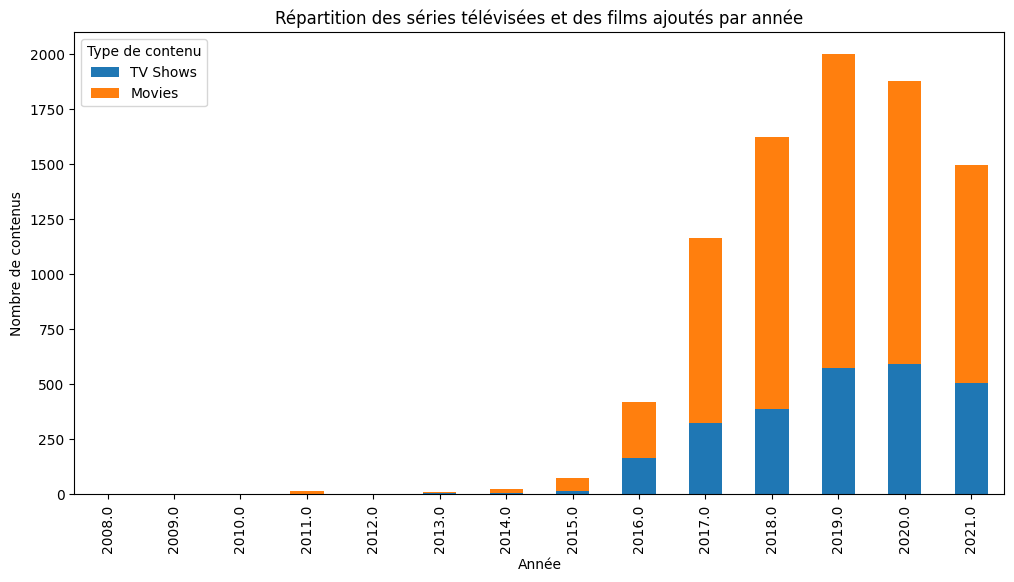

In [30]:
df = pd.read_csv(r"C:\Users\malik\Desktop\Analyse de donnees\netflix.csv")

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['year_added'] = df['date_added'].dt.year

df = df.dropna(subset=['date_added'])

tv_shows_mask = df['type'] == 'TV Show'

movies_mask = df['type'] == 'Movie'

tv_shows_count = df[tv_shows_mask].groupby('year_added').size()

movies_count = df[movies_mask].groupby('year_added').size()

content_count_df = pd.DataFrame({
    'TV Shows': tv_shows_count,
    'Movies': movies_count
}).fillna(0)  # Remplacer NaN par 0 pour les années sans données

content_count_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Répartition des séries télévisées et des films ajoutés par année')
plt.xlabel('Année')
plt.ylabel('Nombre de contenus')
plt.legend(title='Type de contenu')
plt.show()
